# Ampliación de Matemáticas. Curso 2022-23.
## Máster INO, ETSI Navales, UPM

## Control 2.

### Nombre y apellidos: 

In [1]:
#Librerías que vamos a usar
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integ

## Apartado 1

Nos encontramos con la siguiente función en  pyhton:

```python
def method(f, xs, hs):
          
    return (f(xs - hs) - 2*f(xs) + f(xs + hs)) / (hs * hs)
```

- (1 p.) ¿Para qué sirve esta función? ¿Qué metodo numérico utiliza? Escribe tu respuesta abajo en una celda *Markdown*.

>Sirve para: dada una función `f`un punto `xs` y un número real `h` devolver una aproximación de la derivada segunda de `f` en `xs`, que mejora (si no hubiera errores de redondeo) a medida que `hs`disminuye. 

>El método numérico que utiliza es la diferencia centrada de orden dos por los puntos `xs-hs`, `xs`, `xs+hs`.

- (1 p.) Ejecutamos ahora

```python
import numpy as np
import matplotlib.pyplot as plt

hs  = 2.0**(-np.arange(1, 60, 1))
cen = method(np.exp, 1, hs)
eps = np.finfo(float).eps

e1   = np.abs(np.exp(1) - cen)
et = eps / (hs*hs) + (hs*hs / 24.) * np.exp(1)

plt.loglog(hs, e1, 'go')
plt.loglog(hs, et, 'g--')
```

¿Qué acción realiza este código? Interpreta las dos gráficas que se obtienen a través de los resultados teóricos vistos en clase. Escribe tu respuesta abajo en una celda *Markdown*.

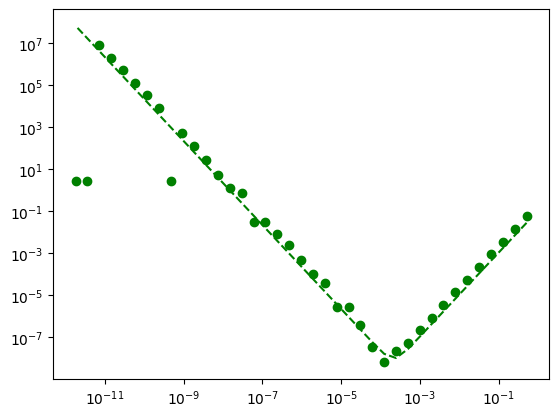

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def method(f, xs, hs):
          
    return (f(xs - hs) - 2*f(xs) + f(xs + hs)) / (hs * hs)

hs  = 2.0**(-np.arange(1, 40, 1))
cen = method(np.exp, 1, hs)
eps = np.finfo(float).eps

e1   = np.abs(np.exp(1) - cen)
et = eps / (hs*hs) + (hs*hs / 24.) * np.exp(1)

plt.loglog(hs, e1, 'go')
plt.loglog(hs, et, 'g--')

Se está calculando una aproximación para la derivada segunda de $f(x)=e^x$ en $x=1$. 

La línea discontinua represente la cota superior para el error que tiene en cuenta el error de redondeo en función de $h$. Los puntos representan el error entre los valores aproximados por la diferencia centrada en función de $h$ y el valor $f''(1)=e$. Ambas gráficas están representadas en escala $\log\log$.

Se observa como, para $h$ cada vez más pequeño, los valores del error siguen la tendencia de la cota del error o están por debajo.

- (1 p.) Repite el ejercicio anterior con el código:

```python
import numpy as np
import matplotlib.pyplot as plt

hs  = 2.0**(-np.arange(1, 60, 1))
cen = method(lambda x: x**2, 1, hs)
eps = np.finfo(float).eps

e1   = np.abs(2 - cen)
et = eps / (hs*hs)

plt.loglog(hs, e1, 'go')
plt.loglog(hs, et, 'g--')
```

Escribe tu respuesta abajo en una celda *Markdown*.
 

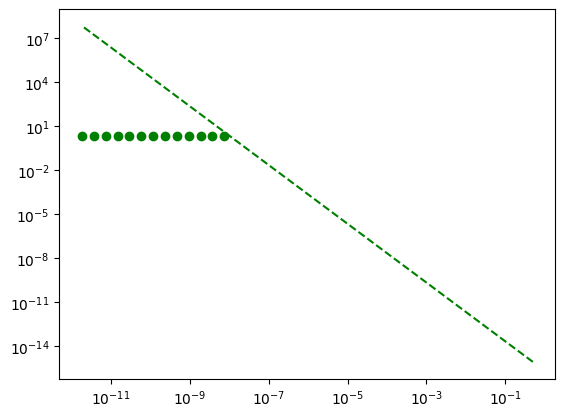

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def method(f, xs, hs):
          
    return (f(xs - hs) - 2*f(xs) + f(xs + hs)) / (hs * hs)

hs  = 2.0**(-np.arange(1, 40, 1))
cen = method(lambda x: x**2, 1, hs)
eps = np.finfo(float).eps

e1   = np.abs(2 - cen)
et = eps / (hs*hs)

plt.loglog(hs, e1, 'go')
plt.loglog(hs, et, 'g--')


>Se trata de las gráficas análogas a las del ejercicio anterior para la función $f(x)=x^2$.

>En este caso, el error es igual a cero para $h>10^{-8}$. A partir de este valor, el error es púramente debido al redondeo y se mantiene esencialmente constante. La diferencia centrada debería de forma exacta esta función; esto deja de ser el caso si tomamos $h$ demasiado pequeño debido al redondeo causado por la aritmética de coma flotante.

## Apartado 2

El periodo de un péndulo simple de longitud $L$ es

$$
T(\theta_0)=4\sqrt{\frac{L}{g}}\int_0^{\pi/2}\frac{1}{\sqrt{1-\sin^2(\theta_0/2)\sin^2(x)}}dx,
$$

siendo $L=1$ m y $g=9.80665$ m/s$^2$. 

- (0.5 p.) Deseamos calcular numéricamente $T(\theta_0)$ para distintos valores de $\theta_0$. De entre estos tipos de reglas de cuadratura: simple, compuesta, adaptativa, ¿cuál(es) se adapta(n) mejor a este cálculo? Razona tu respuesta y escríbela en una celda *Markdown*.

>Las reglas simples no son, en general, adecuadas para calcular esta integral, al ser el intervalo de integración demasiado grande frente a las variaciones del integrando. Además, si consideramos reglas de tipo Newton-Cotes con un número de nodos mayor que $8$ el cálculo será inestable. Una alternativa es utilizar cuadratura Gaussiana; pero este método es demasiado costoso frente a otros más adecuados en este caso.

>Las reglas compuestas o adaptativas son la mejor opción, puesto que eligiendo un número suficientemente grande de nodos, podemos obtener la precisión que deseemos (dentro de los límites de la artimética de coma flotante).

- (1,5 p.) Aproxima numéricamente los valores $T(\theta_0)$ para $\theta_0 = \pi/12, \pi/6, \pi/4$ con un método adecuado de tu elección.

In [4]:
# definimos el integrando 
def f(x,theta):
    return 1/np.sqrt(1-np.sin(theta/2)**2*np.sin(x)**2)

g = 9.80665
L = 1

# definimos una función que calcula la integral para un valor de theta dado
def ell(theta):
    theta = np.array(theta) # perimitmos que el usuario pueda pasar un vector de valores de theta
    T = np.zeros_like(theta) # T contiene el vector con los distintos valores de las integrales
    for n in range(len(T)): # lo hacemos con un bucle porque quad no permite que le pasemos un vector con los mismos valores de un argumento
        temp = integ.quad(f, 0, np.pi/2, args = (theta[n],)) 
        T[n] = temp[0] 
    return 4*np.sqrt(L/g)*T

for theta in ([np.pi/12], [np.pi/6], [np.pi/4], [np.pi/2]):
    print('T(', theta[0], ') = ',ell(theta)[0])

T( 0.2617993877991494 ) =  2.015038014606196
T( 0.5235987755982988 ) =  2.041338465858368
T( 0.7853981633974483 ) =  2.0866121798349586
T( 1.5707963267948966 ) =  2.36824634628601


- (1 p.) Produce una figura que contenga la gráfica de la función $T(\theta)$ para $0\leq \theta \leq \pi/2$.

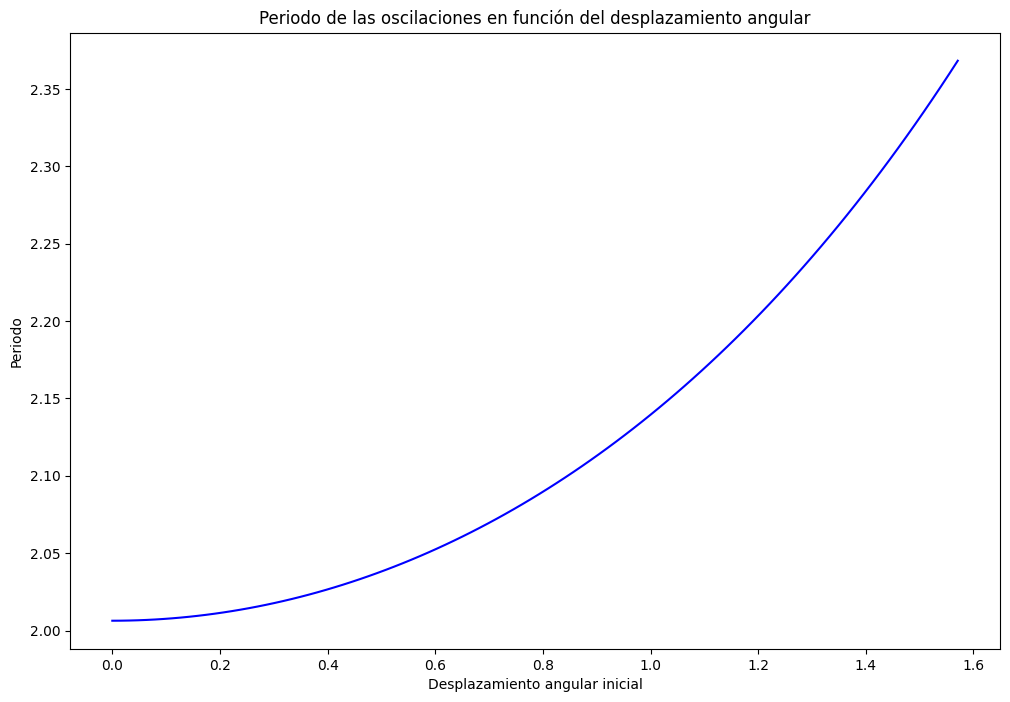

In [5]:
theta_eval = np.linspace(0,np.pi/2, 100)
T_eval =  ell(theta_eval)

plt.figure(figsize=(12,8))
plt.plot(theta_eval, T_eval, 'b')
plt.xlabel('Desplazamiento angular inicial')
plt.ylabel('Periodo')

plt.title('Periodo de las oscilaciones en función del desplazamiento angular')
plt.show()

- (Extra 1 p.) Toma diez puntos equiespaciados entre $0$ y $\pi/4$ y aproxima  $T(\theta)$ por esos puntos mediante polinomios aproximadores de grados $1,2,3, 4$. Respresenta gráficamente los resultados obtenidos ¿Cual proporciona la mejor aproximación? ¿Qué conclusiones obtenemos sobre el comportamiento de la amplitud como función del desplazamiento inicial?

Estos son los coeficientes del polinomio de grado 1 [0.10159957 1.9943882 ]
Estos son los coeficientes del polinomio de grado 2 [ 0.13353582 -0.00327921  2.0065914 ]
Estos son los coeficientes del polinomio de grado 3 [1.21213693e-02 1.19255667e-01 9.76253567e-04 2.00638840e+00]
Estos son los coeficientes del polinomio de grado 4 [ 8.48411662e-03 -1.20544996e-03  1.25781301e-01 -3.86417545e-05
  2.00640966e+00]


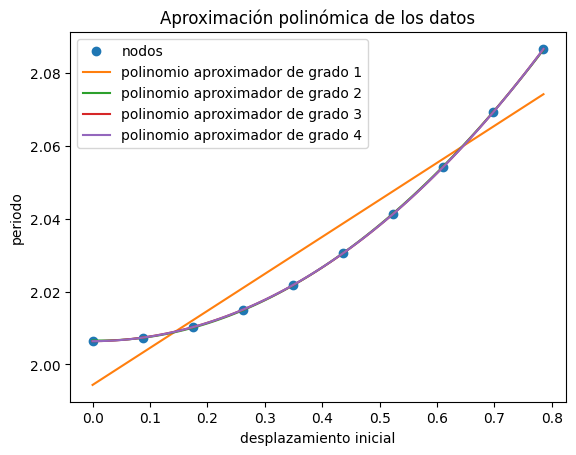

In [15]:
ths = np.linspace(0, np.pi/4, 10)
Ts  = ell(ths)

theta_eval = np.linspace(0, np.pi/4, 100)

plt.plot(ths, Ts, 'o', label='nodos')


for n in range(1,5):
    coefs = np.polyfit(ths, Ts, n)
    a_eval = np.polyval(coefs, theta_eval)
    plt.plot(theta_eval, a_eval, label='polinomio aproximador de grado %d'%n)
    print('Estos son los coeficientes del polinomio de grado %d'%n, coefs)
     
plt.title('Aproximación polinómica de los datos')
plt.xlabel('desplazamiento inicial')
plt.ylabel('periodo')
plt.legend()

>Cualquiera de las aproximaciones polinómicas de grados $2,3,4$ capta adecuadamente la tendencia de los periodos. En cualquier caso concluimos que el comportamiento del periodo para pequeños desplazamientos puede suponerse cuadrático, al ser los coeficientes de los términos de orden superior a dos pequeños frente al de orden dos.

## Apartado 3

Un flotador cónico se desliza libremente a lo largo de la vara de acuerdo con [este esquema](ConoDeslizante.pdf):

![este esquema](ConoDeslizante.png)

Cuando el flotador es desplazado de su posición de equilibrio este desarolla un movimiento oscilatorio de acuerdo con la ecuación diferencial

$$ \frac{d^2y(t)}{dt^2}  = g(1-ay(t)^3), $$

siendo $a=16$ m$^{-3}$ (este parámetro viene determinado por la densidad y dimensiones del flotador) y $g=9.80665$ m/s$^2$.

- (0,5 p.) Reescribe la ecuación diferencial como un sistema de primer orden. ¿A qué valor(es) de $y$ e $\dot{y}$ corresponde la posición de equilibrio del sistema?

>$$ \dot{y} = v,\quad \dot{v} = g(1-ay^3). $$

>Los puntos de equilibrio son las soluciones de 

>$$ v = 0, \quad 1-ay^3=0. $$

>En otras palabras:

>$$ \dot{y} = 0,\quad y=\frac{1}{\sqrt[3]{a}}. $$

- (1 p.) El flotador se desplaza a la posición inicial $y_0=0.1$ m. Representa gráficamente la gráfica del desplazamiento del flotador para tiempos comprendidos entre $t_0=0$ y $T=10$.

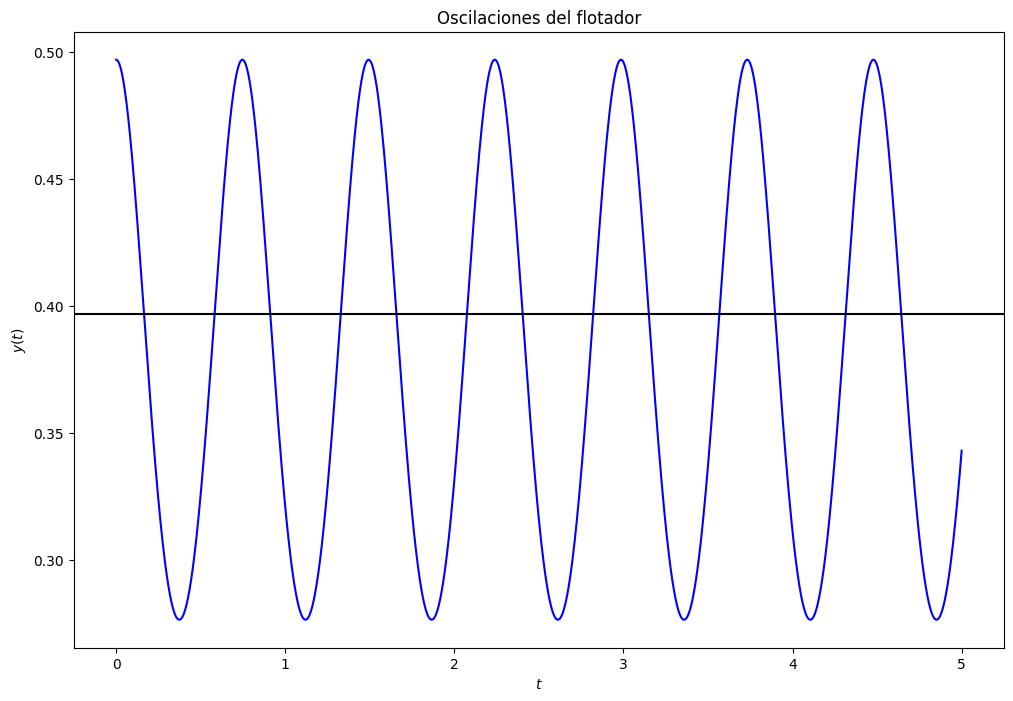

In [7]:
a = 16
g = 9.80665

def F(t,ys):
    y, yp = ys
    return [
        yp, 
        g*(1-a*y**3)
    ]


t0,tf = t_span = [0,5]
y0 = [a**(-1/3)+.1,0] # desplazamos el flotador 0.1 m por encima de su posición de equilibrio

ts = np.linspace(t0,tf,2000)

sol = integ.solve_ivp(
    F, t_span, y0, 
    method='RK45', t_eval = ts, rtol=1e-7
)

ts = sol['t']
ys = sol['y'][0,:]
yps = sol['y'][1,:]

plt.figure(figsize=(12,8))
plt.plot(ts, ys, 'b')
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.axhline(y=a**(-1/3), c='k')

plt.title('Oscilaciones del flotador')
plt.show()


- (1 p.) Representa el diagrama de fases del sistema. Para ello representa gráficamente las trayectorias $(y(t), \dot{y}(t))$ correspondientes a veinte desplazamientos iniciales equiespaciados comprendidos entre $a^{-1/3}$ y $2$.

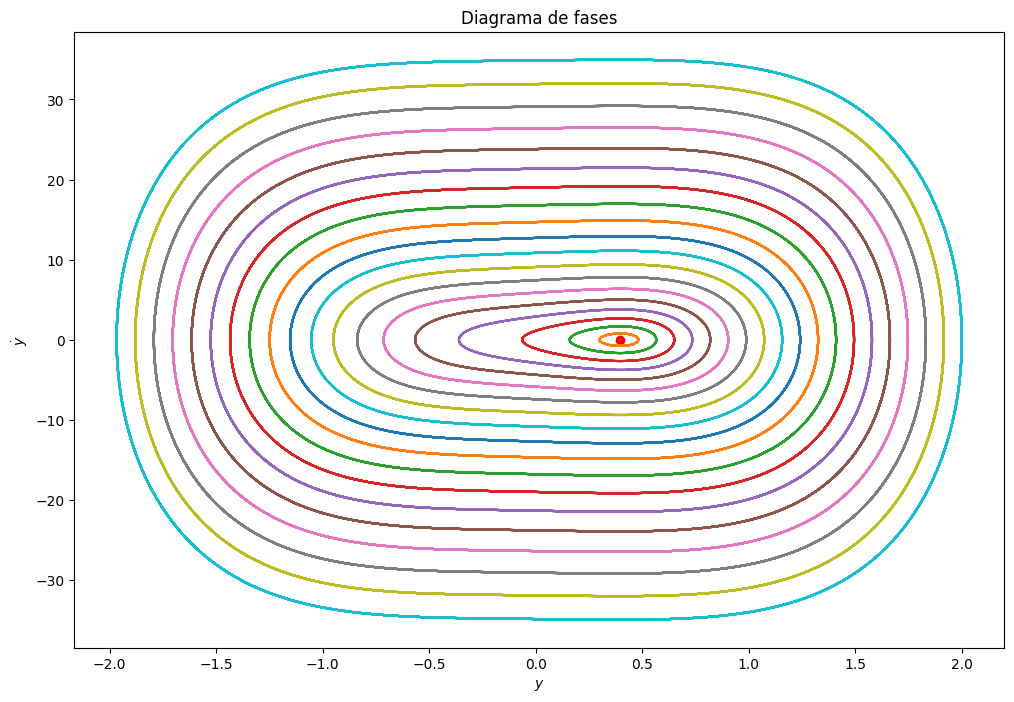

In [8]:
plt.figure(figsize=(12,8))
plt.plot([a**(-1/3)], [0], 'or')
plt.title('Diagrama de fases')
plt.xlabel('$y$')
plt.ylabel('$\dot{y}$')


for pos in np.linspace(a**(-1/3),2,20):
    
    y0 = [pos,0]
    nframes = 2000
    ts = np.linspace(t0, tf, nframes)
    sol = integ.solve_ivp(
    F, t_span, y0, 
    method='RK45', t_eval = ts, rtol=1e-7
    )

    ts = sol['t']
    ys = sol['y'][0,:]
    yps = sol['y'][1,:]
    
    plt.plot(ys, yps)

plt.show()



- (0,5 p.) A la vista de las gráficas obtenidas en el apartado anterior, describe cómo se comporta la amplitud de las oscilaciones en función del desplazamiento inicial ¿observas diferencia entre el comportamiento para desplazamientos pequeños (próximos a $a^{-1/3}$ y grandes (mayores que uno)? Responde más abajo en una celda *Markdown*.

>La amplitud corresponde a la diferencia entre los dos puntos de intersección de las curvas con el eje horizontal. Se observa que para desplazamientos iniciales superiores a $1$ la amplitud crece linealmente en función del desplazamiento inicial. Esto no parece ser el caso para desplazamientos más pequeños.

- (1 p.) Vamos a comprender mejor el comportamiento de la amplitud de las oscilaciones. Para ello, construye una función `A(pos)` que devuelva la amplitud de la onda correspondiente a la solución de la ecuación diferencial con desplazamiento inicial `pos`. Representa la gráfica de esta función (para desplazamientos iniciales comprendidos entre $a^{-1/3}$ y $3$ y discute los resultados obtenidos. En particular, vuelve a responder al apartado anterior teniendo en cuenta esta nueva información.

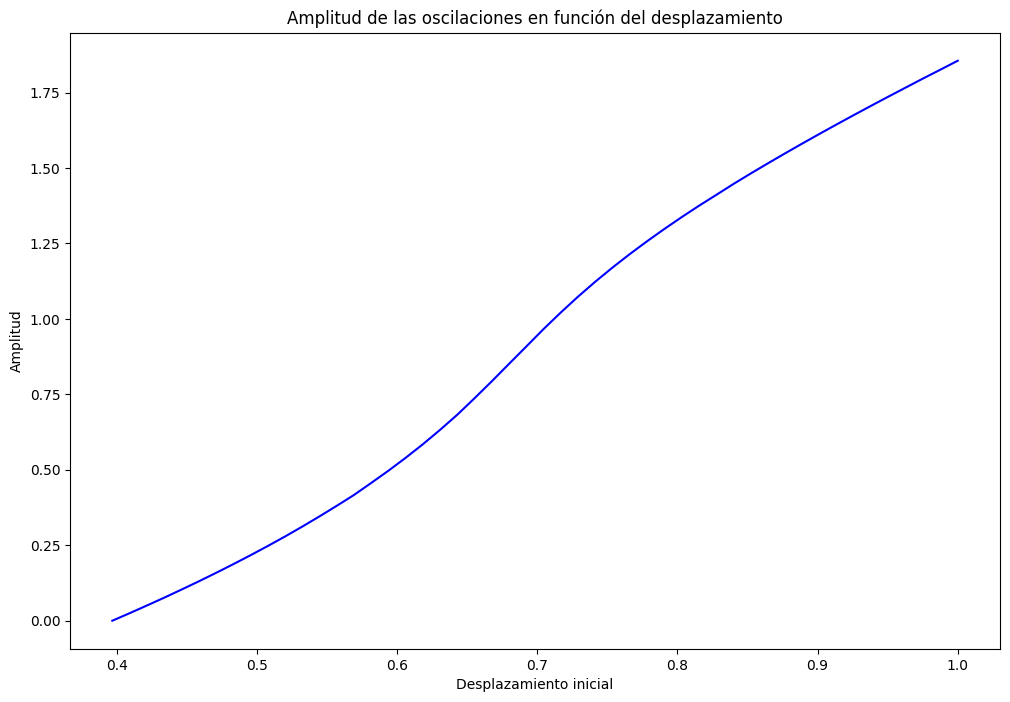

In [9]:
# definimos la función que devuelve la amplitud a partir del desplazamiento

def A(pos):
    amp = np.zeros_like(pos)
    for n in range(len(pos)):
        y0 = np.array([pos[n],0])
        sol = integ.solve_ivp(
        F, t_span, y0, 
        method='RK45', rtol=1e-7
        )
        amp[n]=max(sol['y'][0,:]) - min(sol['y'][0,:])
    return amp

p_eval = np.linspace(a**(-1/3),1, 50)
a_eval = A(p_eval)

plt.figure(figsize=(12,8))
plt.plot(p_eval, a_eval, 'b')
plt.xlabel('Desplazamiento inicial')
plt.ylabel('Amplitud')

plt.title('Amplitud de las oscilaciones en función del desplazamiento')
plt.show()


>La gráfica muestra que se confirma nuestra predicción: para desplazamientos inferiores a $0.8$ la gráfica obtenida claramente difiere de la de una recta.

- (Extra 1 p.) Toma diez puntos equiespaciados entre $a^{-1/3}$ y $0.7$ y aproxima  `A(pos)` por esos puntos mediante polinomios aproximadores de grados $1,2,3$. Representa gráficamente los resultados obtenidos ¿Cual proporciona la mejor aproximación? ¿Qué conclusiones obtenemos sobre el comportamiento de la amplitud como función del desplazamiento inicial?

Estos son los coeficientes del polinomio de grado 1 [ 3.049981   -1.26941881]
Estos son los coeficientes del polinomio de grado 2 [ 5.07586031 -2.51747771  0.20973746]
Estos son los coeficientes del polinomio de grado 3 [ 11.09907671 -13.18517751   7.31285242  -1.51987955]


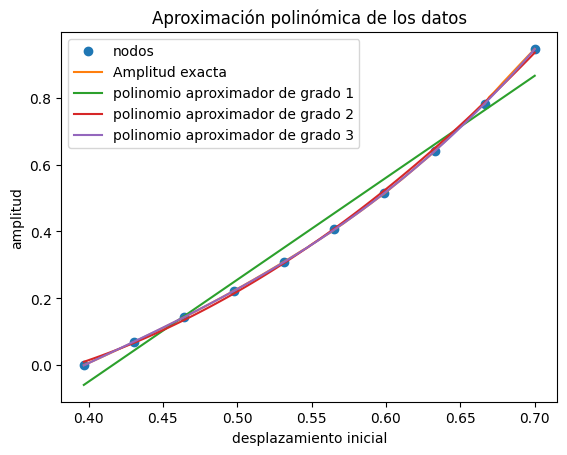

In [19]:
ps = np.linspace(a**(-1/3),0.7, 10)
aes = A(ps)
p_eval = np.linspace(a**(-1/3),0.7, 100)
plt.plot(ps, aes, 'o', label='nodos')
plt.plot(p_eval, A(p_eval), label='Amplitud exacta')


for n in range(1,4):
    coefs = np.polyfit(ps, aes, n)
    a_eval = np.polyval(coefs, p_eval)
    plt.plot(p_eval, a_eval, label='polinomio aproximador de grado %d'%n)
    print('Estos son los coeficientes del polinomio de grado %d'%n, coefs)
   
plt.title('Aproximación polinómica de los datos')
plt.xlabel('desplazamiento inicial')
plt.ylabel('amplitud')
plt.legend()

>El polinomio de grado tres parece aproximar bien las amplitudes en el rango $a^{-1/3}\leq y_0 \leq 0.7$:

>$$ A(y_0) \approx 11.09907671y_0^3 -13.18517751y_0^2 +  7.31285242y_0  -1.51987955.$$
>No obstante, al comparar los coeficientes de orden mayor en los polinomios no observamos una tendencia clara.

- (Extra 1 p.) Repite el ejercicio anterior tomando diez puntos equiespaciados entre $1$ y $4$ y aproxima  `A(pos)` por esos puntos mediante polinomios aproximadores de grados $1,2,3$. Respresenta gráficamente los resultados obtenidos ¿Cual proporciona la mejor aproximación? ¿Qué conclusiones obtenemos sobre el comportamiento de la amplitud como función del desplazamiento inicial?

Estos son los coeficientes del polinomio de grado 1 [ 2.03483975 -0.12512184]
Estos son los coeficientes del polinomio de grado 2 [-0.02463126  2.15799602 -0.25648853]
Estos son los coeficientes del polinomio de grado 3 [ 0.01564289 -0.14195289  2.42583698 -0.43725076]


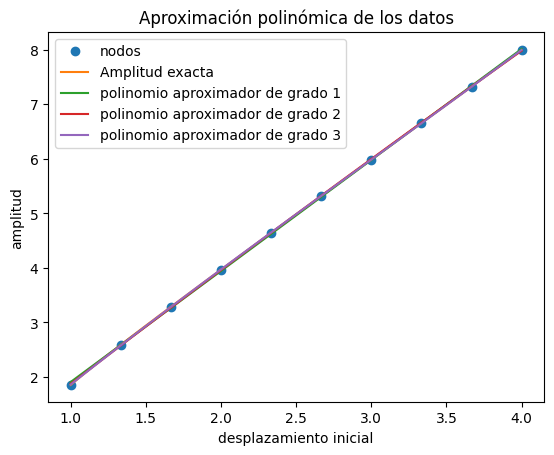

In [14]:
ps = np.linspace(1,4, 10)
aes = A(ps)
p_eval = np.linspace(1,4, 100)
plt.plot(ps, aes, 'o', label='nodos')
plt.plot(p_eval, A(p_eval), label='Amplitud exacta')


for n in range(1,4):
    coefs = np.polyfit(ps, aes, n)
    a_eval = np.polyval(coefs, p_eval)
    print('Estos son los coeficientes del polinomio de grado %d'%n, coefs)
    plt.plot(p_eval, a_eval, label='polinomio aproximador de grado %d'%n)

    
plt.title('Aproximación polinómica de los datos')
plt.xlabel('desplazamiento inicial')
plt.ylabel('amplitud')
plt.legend()

>Para $4>y_0>1$ las amplitudes crecen linealmente:
$$ A(y_0) \approx 2.03483975y_0 -0.12512184.$$
Obsérvese que los coeficientes de los términos no lineales de los polinomios de orden superior son pequeños frente al coeficiente del término lineal.